In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly
import plotly.plotly as py
import numpy as np
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly import tools

In [2]:
#Plotly
py.sign_in('Rashmi62','PZ9Fo2GJIeYUz3z3NQrw')

In [4]:
#Checking the top 5 row sof data 
import warnings
warnings.filterwarnings("ignore")
H1B = pd.read_csv('H1B.csv', index_col=0, header=0)

In [5]:
#Checking the top 5 rows of data 
H1B.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [6]:
#Checking the last 5 rows 
H1B.tail()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550
3002458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ALTANTA, GEORGIA",-84.387982,33.748995


In [7]:
#Number of rows in the original dataset 
H1B.shape[0]

3002458

In [8]:
#Removing all empty rows
H1B = H1B.dropna(axis = 0)
H1B.isnull().values.any()

False

In [9]:
#Rechecking the last few rows to make sure all rows and columns are not missing data
H1B.tail()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002441,WITHDRAWN,"ORACLE AMERICA, INC.","Software Developers, Applications",SOFTWARE ENGINEER (SOFTWARE DEVELOPER 2),Y,64800.0,2011.0,"REDWOOD SHORES, CALIFORNIA",-122.245536,37.536413
3002442,WITHDRAWN,B & D DENTAL CORP.,Materials Scientists,MATERIALS SCIENTIST,N,70553.6,2011.0,"WEST VALLEY, UTAH",-112.001050,40.691613
3002443,WITHDRAWN,"MEDTECH STAFFING & SOLUTIONS, INC",Market Research Analysts and Marketing Special...,MARKET RESEARCH ANALYST,Y,33800.0,2011.0,"AKRON, OHIO",-81.519005,41.081445
3002444,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS",-71.367284,42.599814
3002445,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS",-71.367284,42.599814


In [10]:
#Finding the number of columns in the dataset
#col_num=H1B.shape[1]
#col_num
len(H1B.columns)

10

In [11]:
#Finding the number of rows in the dataset after removing the empty rows
#Alternatively use row_num = H1B.shape[0] 
#row_num
len(H1B)

2877765

In [12]:
#Dropping the unwanted columns in the data set
H1B = H1B.drop(['CASE_STATUS','lon','lat'], axis=1)

In [13]:
#Renaming all the cloumns
H1B.rename(columns={'EMPLOYER_NAME':'Employer Name', "SOC_NAME":"Soc Name",'JOB_TITLE':"Job_Position", 
                    "FULL_TIME_POSITION":'Full time','PREVAILING_WAGE':'Wage','YEAR':'Year',
                    "WORKSITE":'Work Site'}, inplace=True)
H1B.head()

,Employer Name,Soc Name,Job_Position,Full time,Wage,Year,Work Site
1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
2,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
3,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
4,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
5,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"


In [14]:
#creating a count variable for recording the number of H1B applicants
#grouping by another variable
H1B['Applicants'] = 1
H1B.head()

,Employer Name,Soc Name,Job_Position,Full time,Wage,Year,Work Site,Applicants
1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",1
2,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",1
3,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",1
4,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",1
5,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",1


In [15]:
#Creating a copy
H1B1=H1B.copy()

In [16]:
#Finding the Employers with the maximum number of applicants from 2011-2016
H1BEmp = H1B1.drop(['Soc Name','Job_Position','Full time','Wage','Work Site'], axis=1)

In [17]:
H1BEmp.head()

,Employer Name,Year,Applicants
1,UNIVERSITY OF MICHIGAN,2016.0,1
2,"GOODMAN NETWORKS, INC.",2016.0,1
3,"PORTS AMERICA GROUP, INC.",2016.0,1
4,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",2016.0,1
5,PEABODY INVESTMENTS CORP.,2016.0,1


In [18]:
H1BEmp.tail()

,Employer Name,Year,Applicants
3002441,"ORACLE AMERICA, INC.",2011.0,1
3002442,B & D DENTAL CORP.,2011.0,1
3002443,"MEDTECH STAFFING & SOLUTIONS, INC",2011.0,1
3002444,LARSEN & TOUBRO LIMITED,2011.0,1
3002445,LARSEN & TOUBRO LIMITED,2011.0,1


In [19]:
#Finding the number of H1B Applicants by Year
Sum = H1BEmp.groupby('Year').sum()
Sum

,Applicants
Year,
2011.0,333625
2012.0,394267
2013.0,422427
2014.0,498027
2015.0,600120
2016.0,629299


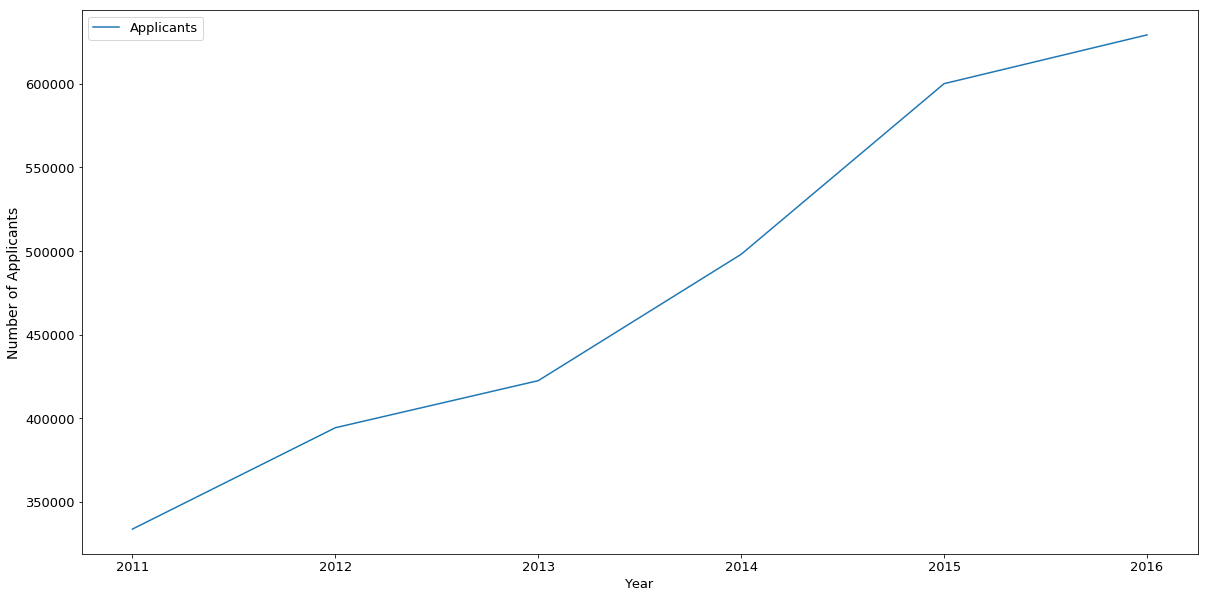

In [20]:
#Using a time series that displays the change in the Number of Applicants sponsored between 2011 and 2016
Sumplot= Sum.plot(figsize=(20,10), fontsize=13)
plt.legend(loc='best', fontsize=13)
Sumplot.set_xlabel('Year', fontsize=13)
Sumplot.set_ylabel('Number of Applicants', fontsize=14)
plt.show()

In [21]:
#Top 10 companies who have applied for the maximum H1Bs for it's employees 
H1BEmpl=H1B.groupby(['Employer Name'])['Applicants'].sum()
H1BEmpl1=H1BEmpl.sort_values(ascending=False).head(10)
H1BEmpl1

Employer Name
INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
Name: Applicants, dtype: int64

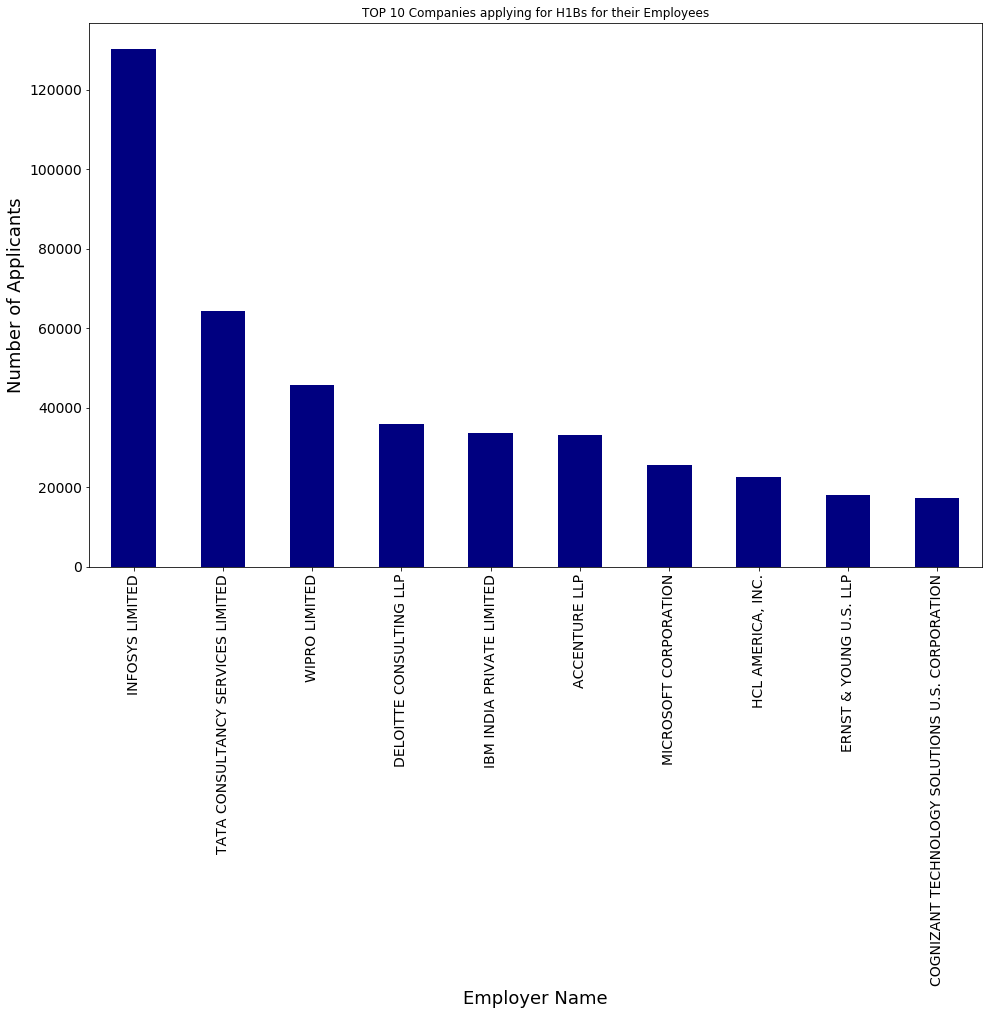

In [22]:
#Plotting a bar graph of the above Computation
H1BEmpl1.plot(kind='bar',title='TOP 10 Companies applying for H1Bs for their Employees' ,
           figsize=(16,10), legend=False, color=['navy'], fontsize=14)
plt.xlabel('Employer Name',fontsize=18)
plt.ylabel('Number of Applicants',fontsize=18)
plt.show()

In [23]:
#Shortlisting the aboe 
H1Btop10=H1B.groupby(['Employer Name', "Year"])["Applicants"].sum()

In [24]:
#The top 10 companies for H1B applicants from 2011-2016
By_year=H1Btop10.loc[['INFOSYS LIMITED','TATA CONSULTANCY SERVICES LIMITED','WIPRO LIMITED','DELOITTE CONSULTING LLP',
                   'IBM INDIA PRIVATE LIMITED','ACCENTURE LLP','MICROSOFT CORPORATION','HCL AMERICA, INC.','ERNST & YOUNG U.S. LLP',
                   'COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION'],]
By_year

Employer Name                                    Year  
ACCENTURE LLP                                    2011.0     1248
                                                 2012.0     2601
                                                 2013.0     4973
                                                 2014.0     5476
                                                 2015.0     9564
                                                 2016.0     9364
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION  2011.0     2649
                                                 2012.0     1827
                                                 2013.0     1697
                                                 2014.0     2352
                                                 2015.0     3490
                                                 2016.0     5307
DELOITTE CONSULTING LLP                          2011.0     3475
                                                 2012.0     4578
                                  

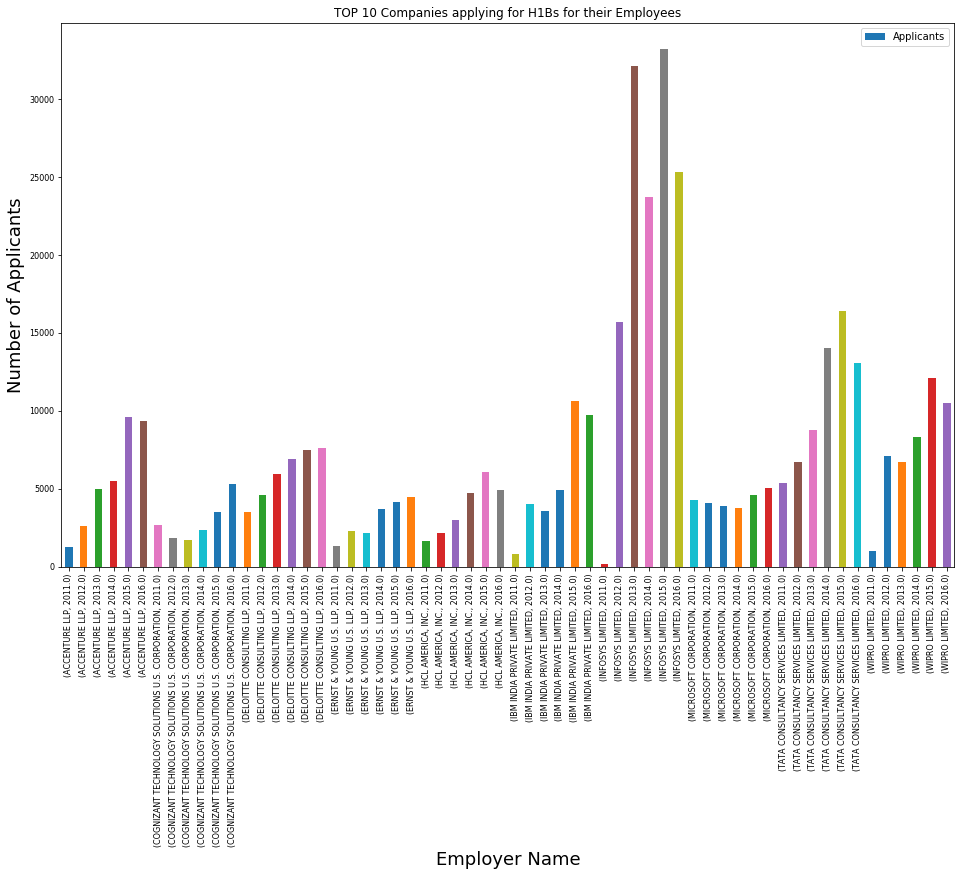

In [25]:
By_year.plot(kind='bar',title='TOP 10 Companies applying for H1Bs for their Employees' ,
           figsize=(16,10), legend=True, fontsize=8)
plt.xlabel('Employer Name',fontsize=18)
plt.ylabel('Number of Applicants',fontsize=18)
plt.show()

In [26]:
# Finding the Statewise H1B Applicants for 2016
H1B2=H1B.copy()

In [27]:
H1BStatewise = H1B2.drop(['Soc Name','Full time',], axis=1)

In [28]:
H1BStatewise.head()

,Employer Name,Job_Position,Wage,Year,Work Site,Applicants
1,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,36067.0,2016.0,"ANN ARBOR, MICHIGAN",1
2,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,242674.0,2016.0,"PLANO, TEXAS",1
3,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",1
4,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",220314.0,2016.0,"DENVER, COLORADO",1
5,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,157518.4,2016.0,"ST. LOUIS, MISSOURI",1


In [29]:
#Using.loc function to narrow year down to 2016
df=H1BStatewise.loc[(H1B2["Year"]==2016)]
df.head()

,Employer Name,Job_Position,Wage,Year,Work Site,Applicants
1,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,36067.0,2016.0,"ANN ARBOR, MICHIGAN",1
2,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,242674.0,2016.0,"PLANO, TEXAS",1
3,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",1
4,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",220314.0,2016.0,"DENVER, COLORADO",1
5,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,157518.4,2016.0,"ST. LOUIS, MISSOURI",1


In [30]:
#Separating Worksite into 2 columns, City and State
new=df["Work Site"].str.split(", ", n=1, expand=True)
df["City"] =new[0]
df["State"]=new[1]
df.head()

,Employer Name,Job_Position,Wage,Year,Work Site,Applicants,City,State
1,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,36067.0,2016.0,"ANN ARBOR, MICHIGAN",1,ANN ARBOR,MICHIGAN
2,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,242674.0,2016.0,"PLANO, TEXAS",1,PLANO,TEXAS
3,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",1,JERSEY CITY,NEW JERSEY
4,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",220314.0,2016.0,"DENVER, COLORADO",1,DENVER,COLORADO
5,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,157518.4,2016.0,"ST. LOUIS, MISSOURI",1,ST. LOUIS,MISSOURI


In [31]:
df=df.drop(["Work Site"],axis=1)

In [32]:
df.head()

,Employer Name,Job_Position,Wage,Year,Applicants,City,State
1,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,36067.0,2016.0,1,ANN ARBOR,MICHIGAN
2,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,242674.0,2016.0,1,PLANO,TEXAS
3,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,193066.0,2016.0,1,JERSEY CITY,NEW JERSEY
4,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",220314.0,2016.0,1,DENVER,COLORADO
5,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,157518.4,2016.0,1,ST. LOUIS,MISSOURI


In [33]:
df1=pd.DataFrame(df)

df1.tail()

,Employer Name,Job_Position,Wage,Year,Applicants,City,State
647793,"HEXAWARE TECHNOLOGIES, INC.",TECHNICAL ARCHITECT,69638.0,2016.0,1,RESTON,VIRGINIA
647794,UNIVERSITY OF MICHIGAN,RESEARCH FELLOW,49800.0,2016.0,1,ANN ARBOR,MICHIGAN
647795,HINDUJA TECH INC.,SENIOR ENGINEER,75275.0,2016.0,1,SALINE,MICHIGAN
647796,L&T TECHNOLOGY SERVICES LIMITED,MECHANICAL ENGINEER,53518.0,2016.0,1,HAMMOND,INDIANA
647797,INFOSYS LIMITED,SENIOR PROJECT MANAGER - US,104478.0,2016.0,1,HOUSTON,TEXAS


In [ ]:
#Applicants for the year 2016 by State
df2=df1.groupby(by=['State']).sum()
df3=df2.sort_values("Applicants", ascending=False).head(10)
df3=df3.drop(['Year','Wage'], axis=1)
df4 = df3.reset_index()
df4

In [87]:
#Column Names
df4.columns

Index(['State', 'Applicants'], dtype='object')

In [150]:
#Converting States in uppercase to Uppercase to Titlecase
#Map function only works with Python2 
df4["State"]=list(map(lambda x:x, df4["State"]))
df4["State"]=df4['State'].str.title()

In [151]:
df4['State'].head()

0    California
1         Texas
2      New York
3    New Jersey
4      Illinois
Name: State, dtype: object

In [152]:
#Converting the US States to their equivalent codes
state = {
    'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}

In [153]:
#Adding the state codes column for plotting
df4['state'] = df4['State'].apply(lambda x : state[x])
df4

,State,Applicants,state
0,California,118481,CA
1,Texas,67176,TX
2,New York,57379,NY
3,New Jersey,47332,NJ
4,Illinois,34201,IL
5,Massachusetts,24313,MA
6,Georgia,24268,GA
7,Washington,22857,WA
8,Pennsylvania,22442,PA
9,Florida,20200,FL


In [154]:
#Creating a map of the top 10 States with the maximum Applicants for 2016
scale = [[0.0, 'rgb(221,221,226)'], [0.2, 'rgb(195,195,202)'],
         [0.4, 'rgb(155,175,202)'], [0.6, 'rgb(140,138,185)'],
         [0.8, 'rgb(97,82,164)'], [1.0, 'rgb(67,22,128)']]

data=[dict(
    type='choropleth',
    colorscale=scale,
    locations = df4['state'],
    z = df4['Applicants'],
    locationmode = 'USA-states',
    hoverinfo='location+z',
    marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
    colorbar = dict(title = "Number of applications"))]

layout= dict(title="Top 10 2016 H1B VISA APPLICATIONS BY STATE",
            geo = dict(scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(92, 244, 256)'),
             )
fig = dict( data=data, layout=layout )
iplot(fig)

In [155]:
H1B3=H1B.copy()

In [156]:
#Short listing components of a dataframe to the year 2011 
dft=H1B3.loc[(H1B["Year"]==2011)]
dft.head()

,Employer Name,Soc Name,Job_Position,Full time,Wage,Year,Work Site,Applicants
2643680,"NYFIX, INC.","Computer Software Engineers, Applications",PROJECT MANAGER,Y,101088.0,2011.0,"NEW YORK, NEW YORK",1
2643681,TGS-NOPEC GEOPHYSICAL COMPANY,"Computer Software Engineers, Applications",PRINCIPAL TRAINER / DEVELOPMENT ANALYST,Y,77480.0,2011.0,"HOUSTON, TEXAS",1
2643682,"AFREN USA, INC.",Engineering Managers,DRILLING MANAGER,Y,165506.0,2011.0,"THE WOODLANDS, TEXAS",1
2643683,"BA-INSIGHT, LLC",Computer Support Specialists,TECHNICAL SUPPORT ENGINEER,Y,62358.0,2011.0,"BOSTON, MASSACHUSETTS",1
2643684,"NIKE, INC.",Marketing Managers,SENIOR GLOBAL CATEGORY COMMERCE MANAGER,Y,111405.0,2011.0,"BEAVERTON, OREGON",1


In [157]:
#Recreating a State and City column 
new1=dft["Work Site"].str.split(", ", n=1, expand=True)
dft["City"] =new1[0]
dft["State"]=new1[1]
dft.head()

,Employer Name,Soc Name,Job_Position,Full time,Wage,Year,Work Site,Applicants,City,State
2643680,"NYFIX, INC.","Computer Software Engineers, Applications",PROJECT MANAGER,Y,101088.0,2011.0,"NEW YORK, NEW YORK",1,NEW YORK,NEW YORK
2643681,TGS-NOPEC GEOPHYSICAL COMPANY,"Computer Software Engineers, Applications",PRINCIPAL TRAINER / DEVELOPMENT ANALYST,Y,77480.0,2011.0,"HOUSTON, TEXAS",1,HOUSTON,TEXAS
2643682,"AFREN USA, INC.",Engineering Managers,DRILLING MANAGER,Y,165506.0,2011.0,"THE WOODLANDS, TEXAS",1,THE WOODLANDS,TEXAS
2643683,"BA-INSIGHT, LLC",Computer Support Specialists,TECHNICAL SUPPORT ENGINEER,Y,62358.0,2011.0,"BOSTON, MASSACHUSETTS",1,BOSTON,MASSACHUSETTS
2643684,"NIKE, INC.",Marketing Managers,SENIOR GLOBAL CATEGORY COMMERCE MANAGER,Y,111405.0,2011.0,"BEAVERTON, OREGON",1,BEAVERTON,OREGON


In [158]:
dft2011=dft.drop(["Work Site"], axis=1)

In [159]:
dft5=dft2011.groupby(by=['State']).sum()
dft13=dft5.sort_values("Applicants", ascending=False).head(10)

In [160]:
dft13=dft13.drop(['Wage','Year' ], axis=1)
dft13 = dft13.reset_index()

In [163]:
dft13["State"]=list(map(lambda x:x, dft13["State"]))
dft13["State"]=dft13['State'].str.title()

In [164]:
#Assigning the State column to state
dft13['state'] = dft13['State'].apply(lambda x : state[x])

In [165]:
#Mapping the top 10 States with the highest H1B Applicants in 2011
data=[dict(
    type='choropleth',
    locations = dft13['state'],
    z = dft13['Applicants'],
    locationmode = 'USA-states',
    hoverinfo='location+z',
    marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
    colorbar = dict(title = "Number of applications"))]

layout= dict(title="Top 10 2011 H1B VISA APPLICATIONS BY STATE",
            geo = dict(scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(82, 232, 242)'),
             )
fig = dict( data=data, layout=layout )
iplot(fig)

In [137]:
#Based on 2016 job titles and Applicants
#dfjt = df.groupby('JOB_TITLE',as_index=False).count()[['JOB_TITLE','Applicants']].sort_values
#('Applicants',ascending=False)[0:20]
dfj=df.groupby(by=['Job_Position']).sum()
dfjt=dfj.sort_values("Applicants", ascending=False)[0:10]

In [138]:
dfj1=dfjt.drop(['Wage', 'Year'], axis=1)
dfj2 = dfj1.reset_index()
dfj2

,Job_Position,Applicants
0,PROGRAMMER ANALYST,52890
1,SOFTWARE ENGINEER,30330
2,SOFTWARE DEVELOPER,13771
3,SYSTEMS ANALYST,12111
4,COMPUTER PROGRAMMER,11448
5,BUSINESS ANALYST,9011
6,COMPUTER SYSTEMS ANALYST,6763
7,SENIOR SOFTWARE ENGINEER,6386
8,DEVELOPER,6030
9,TECHNOLOGY LEAD - US,5403


In [139]:

dfj3 = go.Bar(x=dfj2.Job_Position.values,y=dfj2.Applicants.values)
Plot = go.Layout(dict(title= "Top 10 Positions based on Number of Applicants in 2016",yaxis=dict(title="Num of applications")))

job = [dfj3]
jobt =go.Figure(job,Plot)
iplot(jobt)

In [140]:
#Based on 2011 job titles and applicants
dfjt2011=dft.groupby(by=['Job_Position']).sum()
dfjt2011=dfjt2011.sort_values("Applicants", ascending=False)[0:10]

In [141]:
#Dropping the unnecessary columns and resetting the index
dfj2011=dfjt2011.drop(['Wage','Year'], axis=1)
dfj2011= dfj2011.reset_index()
dfj2011

,Job_Position,Applicants
0,PROGRAMMER ANALYST,29868
1,SOFTWARE ENGINEER,12263
2,SYSTEMS ANALYST,8358
3,COMPUTER PROGRAMMER,8210
4,BUSINESS ANALYST,3760
5,COMPUTER SYSTEMS ANALYST,3443
6,ASSISTANT PROFESSOR,3307
7,SENIOR SOFTWARE ENGINEER,2806
8,SENIOR CONSULTANT,2541
9,RESEARCH ASSOCIATE,2390


In [142]:
#Hover map with the top 10 highest applicants for H1Bs in 2011
#Hover map with the top 10 highest applicants for H1Bs in 2016
dfjt12011 = go.Bar(x=dfj2011.Job_Position.values,y=dfj2011.Applicants.values)
Plot = go.Layout(dict(title= "Top 10 Positions based on Number of Applicants in 2011",yaxis=dict(title=
                                                                                                 "Num of applications")))

job2011 = [dfjt12011]
jobt2011 =go.Figure(job2011,Plot)
iplot(jobt2011)

In [143]:
#Highest Average wage of H1B employees based on top 10 States in 2016
df201=dft.groupby(by=['State']).mean()
df201=df201.drop(['Year','Applicants' ]
                  , axis=1)
df301=df201.sort_values("Wage", ascending=False).head(10)
df301=df301.reset_index()
df301

,State,Wage
0,NEW MEXICO,702890.937421
1,KANSAS,575756.655183
2,SOUTH DAKOTA,543404.245985
3,ALABAMA,328635.849270
4,ARIZONA,274940.239828
5,UTAH,274021.952565
6,OKLAHOMA,266557.303145
7,MASSACHUSETTS,253773.139430
8,NEW JERSEY,235463.005504
9,VIRGINIA,234104.702275


In [144]:
# Highest Average Wages in 2011 by State
Wage101=df.groupby(by=['State']).mean()
Wage101=Wage101.drop(['Year','Applicants' ], axis=1)
Wages101=Wage101.sort_values("Wage", ascending=False)

In [145]:
#Comparing the average wages of H1B employees in the top 10 States with its 2011 figures
Wages2011= Wage101.loc[["NEW MEXICO",
"KANSAS","SOUTH DAKOTA","ALABAMA","ARIZONA","UTAH","OKLAHOMA","MASSACHUSETTS","NEW JERSEY","VIRGINIA"],]
Wages2011

,Wage
State,
NEW MEXICO,70858.234305
KANSAS,66103.001593
SOUTH DAKOTA,391515.049498
ALABAMA,138083.813486
ARIZONA,102859.476030
UTAH,100483.683035
OKLAHOMA,59242.845821
MASSACHUSETTS,74897.666804
NEW JERSEY,85593.989268


In [146]:
#Drawing a comparison between the top 10 Average wages by State in 2016 with its 2011 figures using plotly
Year2016 = go.Bar(
    x=["NEW MEXICO",
"KANSAS","SOUTH DAKOTA","ALABAMA","ARIZONA","UTAH","OKLAHOMA","MASSACHUSETTS","NEW JERSEY","VIRGINIA"],
    y=[702890.937421,575756.655183,543404.245985,328635.849270,274940.239828,274021.952565,266557.303145,253773.139430,
       235463.005504,234104.702275],
    name='2016 Average Wages',
    marker=dict(
        color='rgb(55,128,174)'
    )
)
Year2011 = go.Bar(
    x=["NEW MEXICO","KANSAS","SOUTH DAKOTA","ALABAMA","ARIZONA","UTAH","OKLAHOMA","MASSACHUSETTS","NEW JERSEY",
"VIRGINIA"],
    y=[70858.234305,66103.001593,391515.049498,138083.813486,102859.476030,100483.683035,59242.845821,74897.666804,
       85593.989268,72360.771528],
    name='2011 Average Wages',
    marker=dict(
        color='rgb(190,190,202)',
    )
)

data = [Year2016, Year2011]
layout = go.Layout(
    xaxis=dict(tickangle=-39),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Wage Bars')

In [147]:
#Selecting Data Scientist jobs 
H1B2['DataScientist'] = np.nan
H1B2.DataScientist[H1B2['Job_Position'].str.contains('DATA SCIENTIST')] = 'DATA SCIENTIST'

In [148]:
#Data Scientist jobs from 2011-2016
df56 = H1B2.groupby(['Year','DataScientist']).count().reset_index()
df57=df56.drop(['Wage','Employer Name','Soc Name','Job_Position','Full time','Work Site'], axis=1)
df57=df57.reset_index()
df57

,index,Year,DataScientist,Applicants
0,0,2011.0,DATA SCIENTIST,17
1,1,2012.0,DATA SCIENTIST,75
2,2,2013.0,DATA SCIENTIST,182
3,3,2014.0,DATA SCIENTIST,444
4,4,2015.0,DATA SCIENTIST,934
5,5,2016.0,DATA SCIENTIST,1477


In [149]:
#Using plotly to plot the Growth in the position of data scientists over the years 2011-2016
Plot = []

Plot.append(go.Scatter(x = df57.Year,y= df57.Applicants))

layout = go.Layout(dict(title= "GROWTH IN JOB POSITION OF DATA SCIENTISTS",xaxis=dict(title="Years"),
                        yaxis=dict(title="Number of applications")))
Lineplot = go.Figure(Plot,layout)    
iplot(Lineplot)    